<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


##### Import Necessary Modules:


In [1]:
# Data processing libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For downloading
import requests
from tqdm.notebook import tqdm
from urllib.parse import urlparse

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
data_name = urlparse(dataset_url).path.strip('/').split('/')[-1]

In [4]:
# Read data and display
df = pd.read_csv(data_name)
df.head(n=3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [5]:
df.describe(include='all')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65457.000000,65457,65457,65457,54820,65457,54480,60803,60507,49251,40907,59887,51623,59463,47488,47414,45188,43366,43675,58949,46692,3.374400e+04,59763,55769,50888,50269,42571,38570,42378,34543,31388,45171,38544,34952,22221,17606,16739,39450,32969,29601,52497,46098,44011,57609,52103,50727,58190,52986,48103,38973,37210,55561,46724,44725,44460,36708,35550,60306,59555,59579,45251,58980,59181,60926,45883,36902,37309,37028,35079,30697,24417,13439,12502,24431,2355,1148,44698,41556,37536,44490,29807,29664.000000,28669,28026,28100,28035,27885,27869,27783,27763,27640,28374,28369,27715,28916,28849,28255,27768,28496,28812,28863,29330.000000,29399.000000,29417.000000,29456.000000,29454.000000,29462.000000,29462.000000,29456.000000,29451.000000,56198,56255,2.343700e+04,29131.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,113,52,52,34,10,3,215,3,386,185,142,NaN,23864,22769,12335,9050,8478,4051,5467,4784,2556,12235,11654,5460,1630,1471,1053,9288,10263,4917,19883,16549,11804,14168,9751,7545,2488,2032,6014,3801,2661,5049,3205,2555,2663,2361,1488,32,5,3,6,111,6,3,6,113,5,5,1310,1949,1531,700,539,884,249,286,3,126,232,2,2,NaN,5,5,5,5,5,5,5,5,5,5,5,5,5,5,954,514,3,9,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,10,2,"Developer, full-stack",20 to 99 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Customization;Reputation for quality and ...,United States of America,EUR European Euro,NaN,HTML/CSS;JavaScript;TypeScript,Python,Python,PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS),Amazon Web Services (AWS),Amazon Web Services (AWS),React,React,React,Rasberry Pi,Rasberry Pi,Rasberry Pi,.NET (5+),.NET (5+),.NET (5+),Docker,Docker,Docker,Visual Studio Code,Visual Studio Code,Visual Studio Code,Windows,Windows,Jira,Jira,Jira,Microsoft Teams,Microsoft Te

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [6]:
# 1. Identifying missing values
missing=df.isna()

In [7]:
missing_stats=missing.sum().sort_values(ascending=False).to_frame(name='count')
missing_stats['Missing (%)'] = (missing_stats['count'] / len(df) * 100).round(3)
missing_stats

,count,Missing (%)
AINextMuch less integrated,64309,98.246
AINextLess integrated,63102,96.402
AINextNo change,52955,80.900
AINextMuch more integrated,52018,79.469
EmbeddedAdmired,48718,74.427
EmbeddedWantToWorkWith,47851,73.103
EmbeddedHaveWorkedWith,43236,66.053
ConvertedCompYearly,42020,64.195
AIToolNot interested in Using,41040,62.698
AINextMore integrated,41026,62.676


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



Text(0.5, 1.0, 'Heatmap of Missing Values')

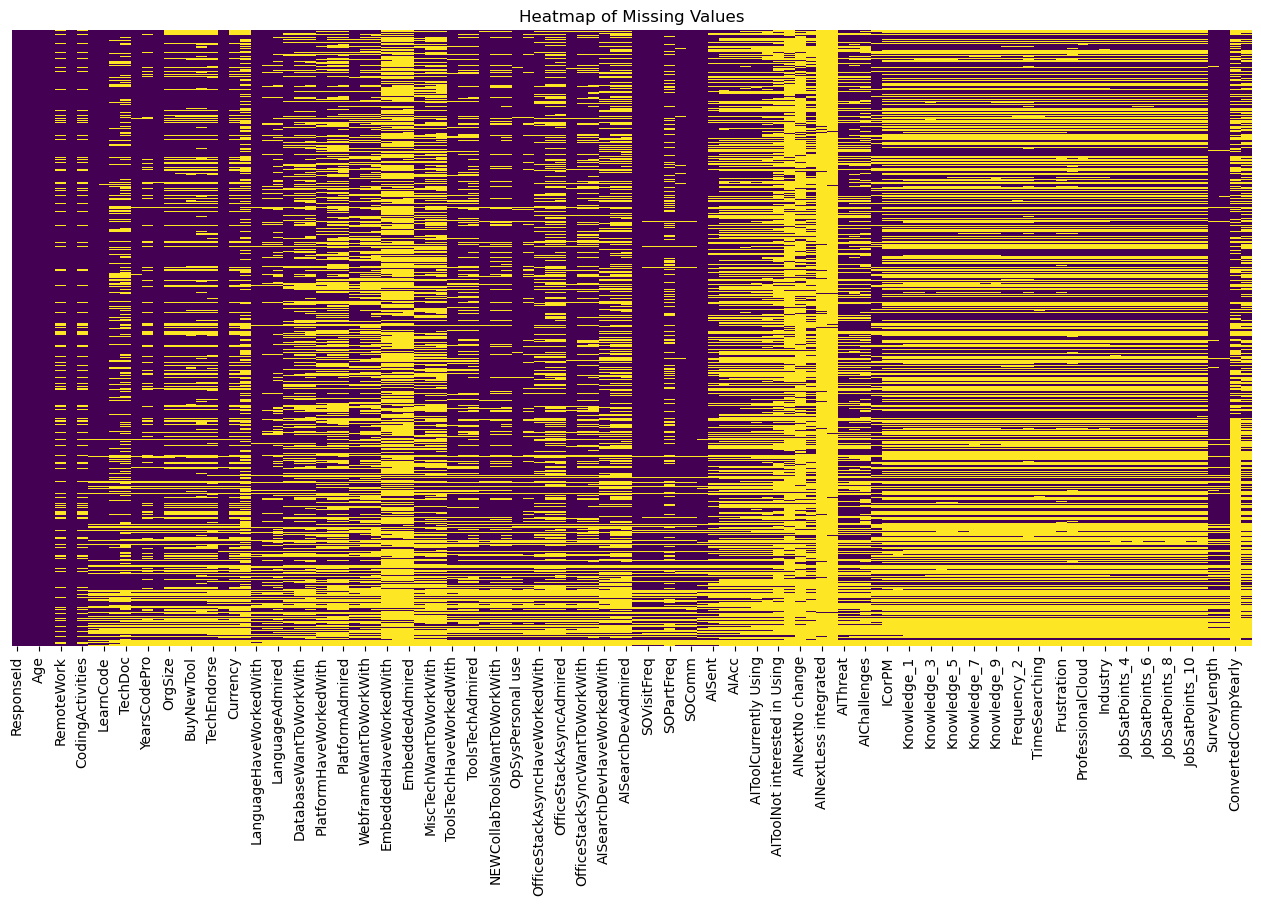

In [8]:
# Heatmap of missing values by default column order
plt.figure(figsize=(16,8))
sns.heatmap(data=missing, cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values")

Text(0.5, 1.0, 'Heatmap of Columns with Missing Values by Descending Count')

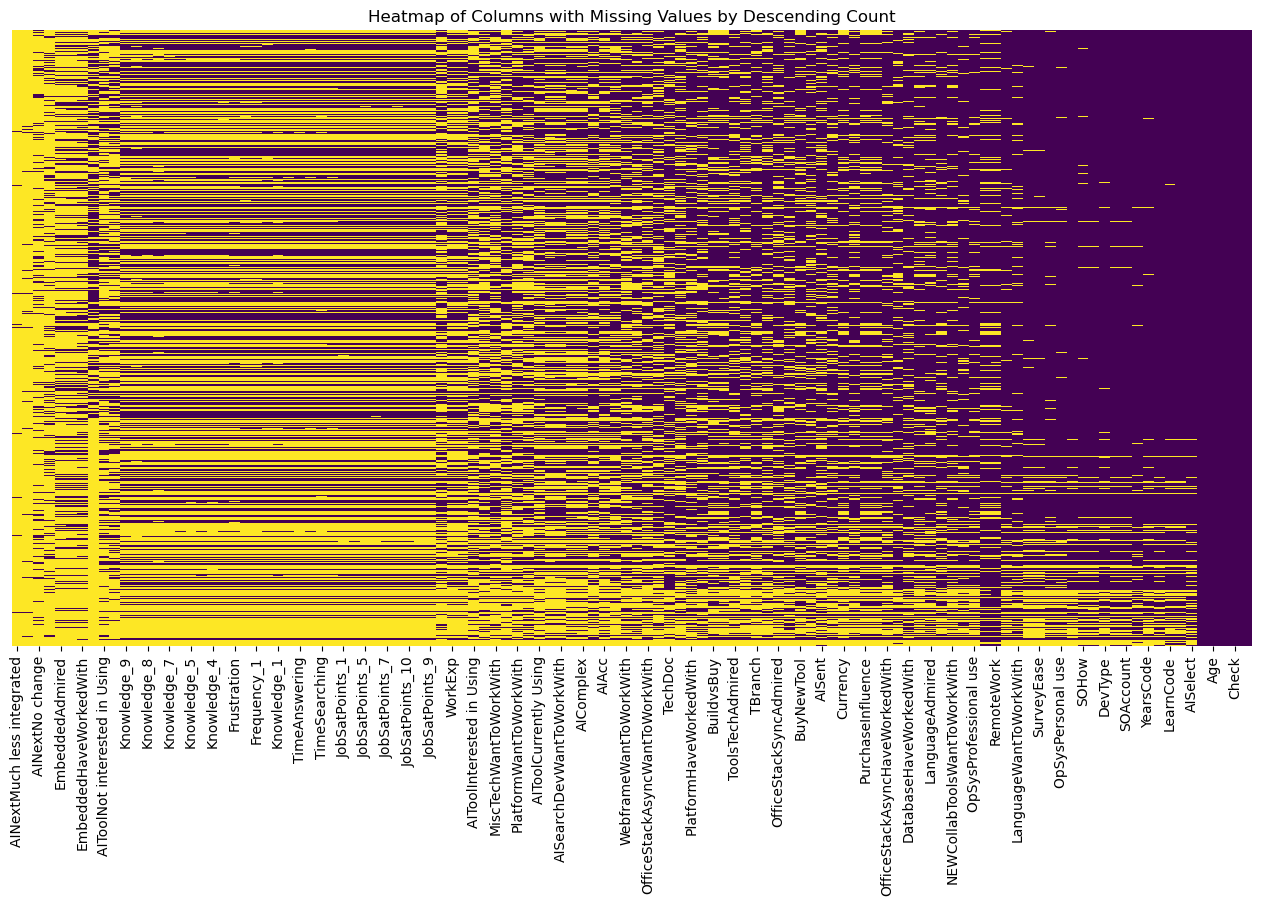

In [9]:
# Sorting columns by missing values
plt.figure(figsize=(16,8))
sns.heatmap(data=missing[missing_stats.index], cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Columns with Missing Values by Descending Count")

Text(0.5, 1.0, 'Heatmap of Columns w/ Missing Values over 50%')

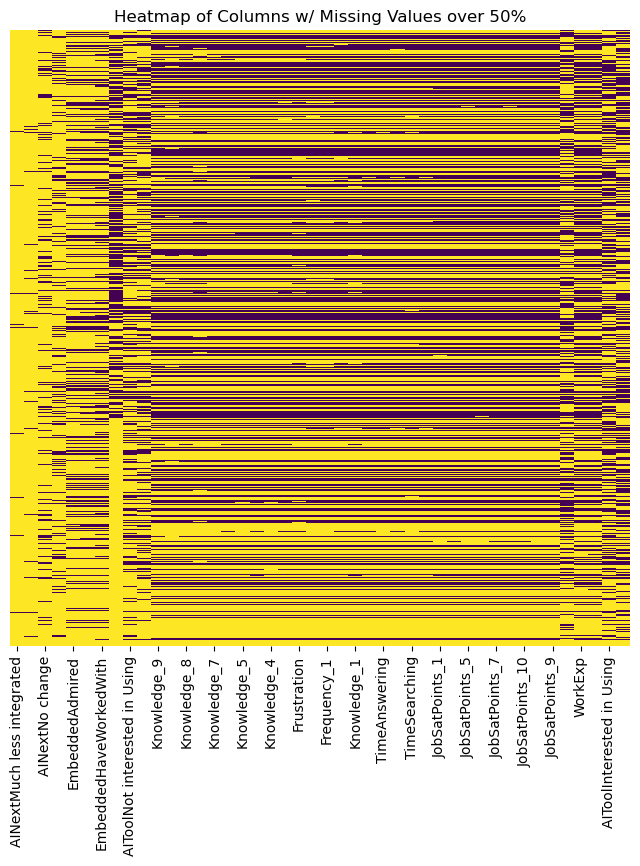

In [10]:
# Filtering for columns only with above 25% missing values
plt.figure(figsize=(8, 8))
sns.heatmap(data=missing[missing_stats[missing_stats['Missing (%)'] > 50].index], cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Columns w/ Missing Values over 50%")

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [11]:
print(f"Employment missing rows: {missing_stats.loc['Employment', 'count']}")

Employment missing rows: 0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [12]:
mode = df['Employment'].mode()[0]

##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [13]:
df['Employment'].value_counts().sort_values().to_frame()

,count
Employment,
"Not employed, but looking for work;Not employed, and not looking for work;Student, part-time;Employed, part-time",1
"Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time",1
"Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",1
"Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time;Retired",1
"Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed",1
"Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired",1
"Student, full-time;Not employed, but looking for work;Retired",1
"Employed, full-time;Not employed, but looking for work;Not employed, and not looking for work;Employed, part-time",1
"Employed, full-time;Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired",1


In [14]:
df['Employment'] = df['Employment'].fillna(mode, axis=0)

### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


In [20]:
employments = df['Employment'].value_counts().to_frame().reset_index().head(n=10)
employments

,Employment,count
0,"Employed, full-time",39051
1,"Independent contractor, freelancer, or self-em...",4847
2,"Student, full-time",4713
3,"Employed, full-time;Independent contractor, fr...",3558
4,"Not employed, but looking for work",2341
5,"Employed, part-time",1266
6,"Student, full-time;Employed, part-time",1116
7,"Employed, full-time;Student, full-time",897
8,"Employed, full-time;Student, part-time",839
9,"Student, full-time;Not employed, but looking f...",687


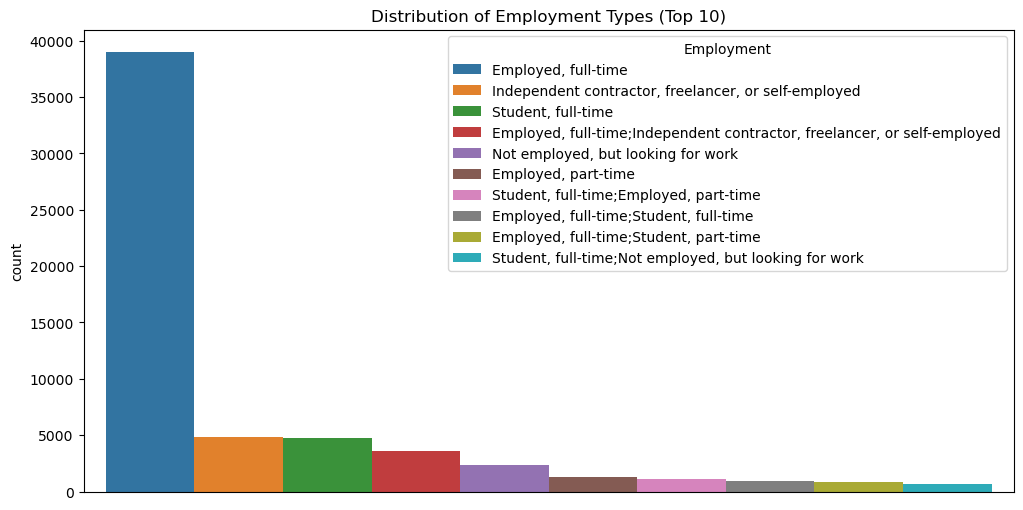

In [38]:
# Visualise top 10 Employment Types
plt.figure(figsize=(12,6))
sns.barplot(data=employments, hue='Employment', y='count')
plt.title('Distribution of Employment Types (Top 10)')
plt.xticks([])
plt.xlim(-0.42, 0.42)
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
